In [10]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K



img_width, img_height = 28, 28

train_data_dir = '/home/dinolin/data/train'
validation_data_dir = '/home/dinolin/data/validation'
nb_train_samples = 12400
nb_validation_samples = 12400
epochs = 100
batch_size = 128

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# model = Sequential()
# model.add(Conv2D(3, (1, 1), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())

# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(1, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)



model.save('modelOCR1.h5')

Found 12400 images belonging to 124 classes.
Found 12400 images belonging to 124 classes.
Epoch 1/100
96/96 [==============================] - 270s 3s/step - loss: -965.1072 - acc: 0.0081 - val_loss: -965.0111 - val_acc: 0.0080
Epoch 2/100
96/96 [==============================] - 258s 3s/step - loss: -966.4103 - acc: 0.0078 - val_loss: -963.3529 - val_acc: 0.0081
Epoch 3/100
96/96 [==============================] - 257s 3s/step - loss: -960.5228 - acc: 0.0083 - val_loss: -964.7870 - val_acc: 0.0083
Epoch 4/100
96/96 [==============================] - 251s 3s/step - loss: -964.1864 - acc: 0.0081 - val_loss: -963.7400 - val_acc: 0.0077
Epoch 5/100
96/96 [==============================] - 253s 3s/step - loss: -968.2598 - acc: 0.0082 - val_loss: -964.5142 - val_acc: 0.0085
Epoch 6/100
96/96 [==============================] - 269s 3s/step - loss: -961.6464 - acc: 0.0081 - val_loss: -965.3392 - val_acc: 0.0077
Epoch 7/100
96/96 [==============================] - 281s 3s/step - loss: -966.393

KeyboardInterrupt: 

In [6]:
accuracy = K.mean(K.equal( validation_data(K.round(y_pred)), axis=-1)
print(accuracy)

NameError: name 'validation_data' is not defined

In [28]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import keras

img_width, img_height = 28, 28

x_train = '/home/dinolin/data/train'
x_test = '/home/dinolin/data/validation'


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
   
# #more reshaping
# x_train = X_train.astype('float32')
# x_test = X_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print('X_train shape:', x_train.shape) #X_train shape: (60000, 28, 28, 1)

# x_train = keras.utils.to_categorical(x_train, 10)
    
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(1, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(x_train,x_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test,x_test))



AttributeError: 'str' object has no attribute 'ndim'

TypeError: Image data cannot be converted to float

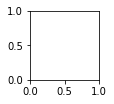

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(x_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [13]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.utils import np_utils



img_width, img_height = 28, 28

X_train = '/home/dinolin/data/train'
X_test = '/home/dinolin/data/validation'
nb_train_samples = 12400
nb_validation_samples = 12400
epochs = 100
batch_size = 128

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Number of hidden units to use:
nb_units = 50
nb_classes = 124
model = Sequential()

# Recurrent layers supported: SimpleRNN, LSTM, GRU:
model.add(SimpleRNN(nb_units,
                    input_shape=(img_width, img_height)))

# To stack multiple RNN layers, all RNN layers except the last one need
# to have "return_sequences=True".  An example of using two RNN layers:
model.add(SimpleRNN(16,
                   input_shape=(img_width, img_height),
                   return_sequences=True))
model.add(SimpleRNN(32))

model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    X_train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    X_test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)



model.save('modelOCR2.h5')

AttributeError: 'str' object has no attribute 'shape'